In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/heat-waves-2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heat-waves-2/Data/January_to_March_2019.csv
/kaggle/input/heat-waves-2/Data/Oct_to_Dec_2019.csv
/kaggle/input/heat-waves-2/Data/August_2021.csv
/kaggle/input/heat-waves-2/Data/July_2021.csv
/kaggle/input/heat-waves-2/Data/July_to_Sept_2019.csv
/kaggle/input/heat-waves-2/Data/June_2022.csv
/kaggle/input/heat-waves-2/Data/September_2021.csv
/kaggle/input/heat-waves-2/Data/December_2021.csv
/kaggle/input/heat-waves-2/Data/August_2022.csv
/kaggle/input/heat-waves-2/Data/April_to_June_2019.csv
/kaggle/input/heat-waves-2/Data/May_2021.csv
/kaggle/input/heat-waves-2/Data/April_to_June_2020.csv
/kaggle/input/heat-waves-2/Data/June_2021.csv
/kaggle/input/heat-waves-2/Data/May_2022.csv
/kaggle/input/heat-waves-2/Data/April_2022.csv
/kaggle/input/heat-waves-2/Data/February_2022.csv
/kaggle/input/heat-waves-2/Data/March_2022.csv
/kaggle/input/heat-waves-2/Data/October_to_December_2020.csv
/kaggle/input/heat-waves-2/Data/October_2021.csv
/kaggle/input/heat-waves-2/Data/April_2021.csv


# Data Loading and Refining

In [114]:
dfs = []
for file in filenames:
    if file.endswith(".csv"):
        file_path = os.path.join(dirname, file)
        print(file_path)
        
        csv_reader =pd.read_csv(file_path,encoding='latin1',names = ['District','Mandal','Date','Rain','Min_Temp','Max_Temp','Min_Humidity','Max_Humidity','Min_Wind_Speed','Max_Wind_Speed'], low_memory=False, chunksize=10000)



        # Loop through each chunk of data and filter the rows with 'Adilabad' and 'Warangal' values
        dfs_filtered = []
        for chunk in csv_reader:
            
#             district_filter = chunk['District'].isin(['Adilabad','Nizamabad', 'Warangal', 'Karimnagar','Khammam'])
#             district_filter = chunk['District'].fillna('').str.contains('(Adilabad|Nizamabad|Warangal|Karimnagar|Khammam).*')
                
            mandal_filter = chunk['Mandal'].fillna('').str.contains('(Adilabad|Nizamabad|Warangal|Karimnagar|Khammam).*')
            df_filtered = chunk[mandal_filter]
            dfs_filtered.append(df_filtered)

        # Concatenate the filtered DataFrames into a single DataFrame
        df_filtered = pd.concat(dfs_filtered)
        df_filtered = df_filtered.drop("District", axis = 1)
    

#     result = []
#     for chunk in csv_reader:
#         result.append(chunk)
#     df = pd.concat(result, ignore_index=True)
    dfs.append(df_filtered)

#     print(dfs.append(pd.read_csv(file)))

/kaggle/input/heat-waves-2/Data/January_to_March_2019.csv
/kaggle/input/heat-waves-2/Data/Oct_to_Dec_2019.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


/kaggle/input/heat-waves-2/Data/August_2021.csv
/kaggle/input/heat-waves-2/Data/July_2021.csv
/kaggle/input/heat-waves-2/Data/July_to_Sept_2019.csv
/kaggle/input/heat-waves-2/Data/June_2022.csv
/kaggle/input/heat-waves-2/Data/September_2021.csv
/kaggle/input/heat-waves-2/Data/December_2021.csv
/kaggle/input/heat-waves-2/Data/August_2022.csv
/kaggle/input/heat-waves-2/Data/April_to_June_2019.csv
/kaggle/input/heat-waves-2/Data/May_2021.csv
/kaggle/input/heat-waves-2/Data/April_to_June_2020.csv
/kaggle/input/heat-waves-2/Data/June_2021.csv
/kaggle/input/heat-waves-2/Data/May_2022.csv
/kaggle/input/heat-waves-2/Data/April_2022.csv
/kaggle/input/heat-waves-2/Data/February_2022.csv
/kaggle/input/heat-waves-2/Data/March_2022.csv
/kaggle/input/heat-waves-2/Data/October_to_December_2020.csv
/kaggle/input/heat-waves-2/Data/October_2021.csv
/kaggle/input/heat-waves-2/Data/April_2021.csv
/kaggle/input/heat-waves-2/Data/January_2022.csv
/kaggle/input/heat-waves-2/Data/July_2022.csv
/kaggle/input/h

In [115]:
len(dfs)

27

In [116]:
dfs[0]

,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
1,Adilabad (Urban),01-01-2019,0,5.4,26.8,20.9,91.7,0,1.2
2,Adilabad (Urban),02-01-2019,0,6.6,28.8,20.9,92.4,0,2.2
3,Adilabad (Urban),03-01-2019,0,9.5,31.3,20.3,86.3,0,1.2
4,Adilabad (Urban),04-01-2019,0,9.3,30.8,24.5,95.2,0,1.4
5,Adilabad (Urban),05-01-2019,0,10.3,30.8,22.6,94.6,0,1.2
...,...,...,...,...,...,...,...,...,...
83696,Warangal,27-03-2019,0.0,24.2,37.4,30.6,94.3,NaN,NaN
83697,Warangal,28-03-2019,0.0,23.9,37.4,25.1,92.9,NaN,NaN
83698,Warangal,29-03-2019,0.0,23.8,38.2,20.3,97.8,NaN,NaN
83699,Warangal,30-03-2019,0.0,24.1,38.3,23.8,100.0,NaN,NaN


In [5]:
# for df in dfs:
#     unique_mandals = pd.Series(df['Mandal'].unique())
#     pattern = '(Adilabad|Nizamabad|Warangal|Karimnagar|Khammam).*'
#     result = df['Mandal'].loc[df['Mandal'].str.contains(pattern)].unique()
#     print(result)

In [117]:
for df in dfs:
    print(df.nunique())

Mandal             12
Date               90
Rain               30
Min_Temp          316
Max_Temp          269
Min_Humidity      623
Max_Humidity      494
Min_Wind_Speed     20
Max_Wind_Speed    240
dtype: int64
Mandal             11
Date               92
Rain              140
Min_Temp          210
Max_Temp          202
Min_Humidity      503
Max_Humidity      216
Min_Wind_Speed     18
Max_Wind_Speed    184
dtype: int64
Mandal             11
Date               31
Rain              136
Min_Temp           87
Max_Temp          145
Min_Humidity      265
Max_Humidity      159
Min_Wind_Speed     28
Max_Wind_Speed    182
dtype: int64
Mandal             11
Date               31
Rain              176
Min_Temp           97
Max_Temp          169
Min_Humidity      278
Max_Humidity      161
Min_Wind_Speed     28
Max_Wind_Speed    180
dtype: int64
Mandal             19
Date               91
Rain              363
Min_Temp          151
Max_Temp          244
Min_Humidity      591
Max_Humidity      257
Mi

In [118]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 1 to 83700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mandal          1440 non-null   object
 1   Date            1440 non-null   object
 2   Rain            1440 non-null   object
 3   Min_Temp        1440 non-null   object
 4   Max_Temp        1440 non-null   object
 5   Min_Humidity    1440 non-null   object
 6   Max_Humidity    1440 non-null   object
 7   Min_Wind_Speed  1170 non-null   object
 8   Max_Wind_Speed  1170 non-null   object
dtypes: object(9)
memory usage: 112.5+ KB


In [119]:
dfs[0].describe()

,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
count,1440,1440,1440.0,1440.0,1440.0,1440.0,1440.0,1170.0,1170.0
unique,12,90,30.0,316.0,269.0,623.0,494.0,20.0,240.0
top,Adilabad (Urban),01-01-2019,0.0,23.9,34.6,32.2,100.0,0.0,0.3
freq,180,16,1144.0,52.0,64.0,11.0,211.0,961.0,56.0


In [120]:
# Create an empty list to store the filtered DataFrames for each district
dfs_adilabad = []
dfs_nizamabad = []
dfs_warangal = []
dfs_karimnagar = []
dfs_khammam = []

# Loop through each DataFrame and filter the rows with the 'District' column
for df in dfs:
    mandal_filter_adilabad = df['Mandal'].str.contains('Adilabad')
    df_adilabad = df[mandal_filter_adilabad]
    if not df_warangal.empty:
        dfs_adilabad.append(df_warangal)
    mandal_filter_warangal = df['Mandal'].str.contains('Warangal')
    df_warangal = df[mandal_filter_warangal]
    if not df_warangal.empty:
        dfs_warangal.append(df_warangal)
    mandal_filter_nizamabad = df['Mandal'].str.contains('Nizamabad')
    df_nizamabad = df[mandal_filter_nizamabad]
    if not df_nizamabad.empty:
        dfs_nizamabad.append(df_nizamabad)
    mandal_filter_karimnagar = df['Mandal'].str.contains('Karimnagar')
    df_warangal = df[mandal_filter_karimnagar]
    if not df_karimnagar.empty:
        dfs_karimnagar.append(df_karimnagar)
    mandal_filter_khammam = df['Mandal'].str.contains('Khammam')
    df_warangal = df[mandal_filter_khammam]
    if not df_warangal.empty:
        dfs_khammam.append(df_warangal)

# Concatenate the filtered DataFrames into a single DataFrame for each district
df_warangal = pd.concat(dfs_adilabad)
df_warangal = pd.concat(dfs_warangal)
df_nizamabad = pd.concat(dfs_nizamabad)
df_karimnagar = pd.concat(dfs_karimnagar)
df_warangal = pd.concat(dfs_khammam)

# five DataFrames
print(df_warangal.describe())
print(df_warangal.describe())

               Mandal        Date    Rain  Min_Temp  Max_Temp Min_Humidity  \
count            3165        3165  3165.0    3165.0    3165.0         3165   
unique              6        1553   413.0     393.0     410.0         1276   
top     Khammam_Rural  01-01-2019     0.0      24.9      34.6          0.0   
freq             1042           4  1551.0     109.0      85.0           32   

       Max_Humidity  Min_Wind_Speed  Max_Wind_Speed  
count          3163          2946.0          2878.0  
unique          505            51.0           344.0  
top           100.0             0.0             0.0  
freq            387          1086.0           422.0  
          Mandal       Date    Rain  Min_Temp  Max_Temp  Min_Humidity  \
count       2739       2739  2739.0    2739.0    2739.0        2739.0   
unique         3       1278   306.0     249.0     265.0         867.0   
top     Warangal  15-May-21     0.0      24.9      32.9           0.0   
freq        1445          4  2053.0     101.0  

In [121]:
print(df_warangal["Mandal"].value_counts())
print(df_warangal["Mandal"].value_counts())
print(df_nizamabad["Mandal"].value_counts())
print(df_karimnagar["Mandal"].value_counts())
print(df_warangal["Mandal"].value_counts())



Khammam_Rural      1042
Khammam_Urban      1042
Khammam (Urban)     403
Khammam             275
Khammam (Rural)     252
Khammam_Urban       151
Name: Mandal, dtype: int64
Warangal           1445
Khilla_Warangal    1042
Khilla Warangal     252
Name: Mandal, dtype: int64
Nizamabad_North    1042
Nizamabad_Rural    1042
Nizamabad_South    1042
Nizamabad           275
Nizamabad North     252
Nizamabad Rural     252
Nizamabad South     252
Name: Mandal, dtype: int64
Karimnagar    81378
Name: Mandal, dtype: int64
Khammam_Rural      1042
Khammam_Urban      1042
Khammam (Urban)     403
Khammam             275
Khammam (Rural)     252
Khammam_Urban       151
Name: Mandal, dtype: int64


In [122]:
df_warangal["Mandal"] = df_warangal["Mandal"].str.strip()

In [123]:
df_warangal.shape

(2739, 9)

In [124]:
df_warangal[(df_warangal["Mandal"]=="Warangal") | (df_warangal["Mandal"]=="Warangal (Urban)")]


,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
83521,Warangal,01-01-2019,0.0,9.7,27.2,24.3,92.2,0.0,5.9
83522,Warangal,02-01-2019,0.0,10.3,29.2,18.7,89.2,0.0,6.6
83523,Warangal,03-01-2019,0.0,13.0,31.6,20.6,98.7,0.0,4.5
83524,Warangal,04-01-2019,0.0,12.5,30.8,33.6,100.0,0.0,5.0
83525,Warangal,05-01-2019,0.0,16.4,30.2,31.5,100.0,0.0,6.9
...,...,...,...,...,...,...,...,...,...
18742,Warangal,27-03-2020,0.0,24.1,35.5,40.9,79.4,7.6,0
18743,Warangal,28-03-2020,0.0,23.9,36.1,35.4,65.9,7.1,0
18744,Warangal,29-03-2020,0.0,23.7,37.5,22.1,87.1,7.0,0
18745,Warangal,30-03-2020,0.0,23.1,37.9,25.0,64.2,8.2,0


In [125]:
# drop duplicates based on Date column, keeping only first occurrence
df_warangal= df_warangal.drop_duplicates(subset="Date", keep="first")

In [126]:
df_warangal.shape

(1278, 9)

In [127]:
df_warangal["Date"].nunique()

1278

# PreProcessing for Adilabad Dataset**

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df_warangal.describe()

,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
count,1278,1278,1278.0,1278.0,1278.0,1278.0,1278.0,1263.0,1202.0
unique,3,1278,191.0,220.0,237.0,703.0,323.0,99.0,137.0
top,Warangal,01-01-2019,0.0,24.9,32.9,0.0,100.0,0.0,0.0
freq,579,1,937.0,52.0,36.0,16.0,340.0,903.0,251.0


In [130]:
df_warangal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 83341 to 18746
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mandal          1278 non-null   object
 1   Date            1278 non-null   object
 2   Rain            1278 non-null   object
 3   Min_Temp        1278 non-null   object
 4   Max_Temp        1278 non-null   object
 5   Min_Humidity    1278 non-null   object
 6   Max_Humidity    1278 non-null   object
 7   Min_Wind_Speed  1263 non-null   object
 8   Max_Wind_Speed  1202 non-null   object
dtypes: object(9)
memory usage: 99.8+ KB


In [131]:
df_warangal.nunique()

Mandal               3
Date              1278
Rain               191
Min_Temp           220
Max_Temp           237
Min_Humidity       703
Max_Humidity       323
Min_Wind_Speed      99
Max_Wind_Speed     137
dtype: int64

# Create a Model for district Adilabad

Keep only the five cities name in five different dataframe.

In [133]:
df_adilabad.loc[df_adilabad['Mandal'].str.contains('Adilabad', case=False), 'Mandal'] = 'Adilabad'
df_warangal.loc[df_warangal['Mandal'].str.contains('Warangal', case=False), 'Mandal'] = 'Warangal'
df_nizamabad.loc[df_nizamabad['Mandal'].str.contains('Nizamabad', case=False), 'Mandal'] = 'Nizamabad'
df_karimnagar.loc[df_karimnagar['Mandal'].str.contains('Karimnagar', case=False), 'Mandal'] = 'Karimnagar'
df_warangal.loc[df_warangal['Mandal'].str.contains('Khammam', case=False), 'Mandal'] = 'Khammam'

In [135]:
print(df_warangal['Mandal'].value_counts())
print(df_warangal['Mandal'].value_counts())
print(df_nizamabad['Mandal'].value_counts())
print(df_karimnagar['Mandal'].value_counts())
print(df_warangal['Mandal'].value_counts())

Khammam    3165
Name: Mandal, dtype: int64
Warangal    1278
Name: Mandal, dtype: int64
Nizamabad    4157
Name: Mandal, dtype: int64
Karimnagar    81378
Name: Mandal, dtype: int64
Khammam    3165
Name: Mandal, dtype: int64


In [136]:
df_warangal.head()

,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
83341,Warangal,01-01-2019,0.0,12.3,30.4,24.7,90.4,0.0,0.1
83342,Warangal,02-01-2019,0.0,14.4,32.6,18.3,77.6,0.0,1.4
83343,Warangal,03-01-2019,0.0,14.5,34.0,21.1,96.2,0.0,0.1
83344,Warangal,04-01-2019,0.0,13.7,34.0,28.1,97.6,0.0,2.6
83345,Warangal,05-01-2019,0.0,17.6,34.8,21.3,96.2,0.0,5.1


In [137]:
print(df_warangal.shape)
df_warangal.nunique()

(1278, 9)


Mandal               1
Date              1278
Rain               191
Min_Temp           220
Max_Temp           237
Min_Humidity       703
Max_Humidity       323
Min_Wind_Speed      99
Max_Wind_Speed     137
dtype: int64

# Build Model for Adilabad

In [138]:
df_warangal = df_warangal.drop('Mandal', axis = 1)

In [140]:
df_warangal.head()

,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
83341,01-01-2019,0.0,12.3,30.4,24.7,90.4,0.0,0.1
83342,02-01-2019,0.0,14.4,32.6,18.3,77.6,0.0,1.4
83343,03-01-2019,0.0,14.5,34.0,21.1,96.2,0.0,0.1
83344,04-01-2019,0.0,13.7,34.0,28.1,97.6,0.0,2.6
83345,05-01-2019,0.0,17.6,34.8,21.3,96.2,0.0,5.1


In [141]:
df_warangal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 83341 to 18746
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1278 non-null   object
 1   Rain            1278 non-null   object
 2   Min_Temp        1278 non-null   object
 3   Max_Temp        1278 non-null   object
 4   Min_Humidity    1278 non-null   object
 5   Max_Humidity    1278 non-null   object
 6   Min_Wind_Speed  1263 non-null   object
 7   Max_Wind_Speed  1202 non-null   object
dtypes: object(8)
memory usage: 89.9+ KB


In [142]:
# change datatype
# df['col1'] = df['col1'].astype(int)

df_warangal["Date"] = pd.to_datetime(df_warangal["Date"])
df_warangal["Rain"] = df_warangal["Rain"].astype(float)
df_warangal["Min_Temp"] = df_warangal["Min_Temp"].astype(float)
df_warangal["Max_Temp"] = df_warangal["Max_Temp"].astype(float)
df_warangal["Min_Humidity"] = df_warangal["Min_Humidity"].astype(float)
df_warangal["Max_Humidity"] = df_warangal["Max_Humidity"].astype(float)
df_warangal["Min_Wind_Speed"] = df_warangal["Min_Wind_Speed"].astype(float)
df_warangal["Max_Wind_Speed"] = df_warangal["Max_Wind_Speed"].astype(float)

In [29]:
# df_warangal['Max_Temp'] = pd.to_numeric(df_warangal['Max_Temp'], errors='coerce')

In [30]:
# df_warangal['Heat_Wave'] = np.where(df_warangal['Max_Temp'] >= 40, 1, 0)

In [143]:
print(np.max(df_warangal),end="\n\n")
np.min(df_warangal)

Date              2022-09-30 00:00:00
Rain                            189.3
Min_Temp                         32.6
Max_Temp                         44.6
Min_Humidity                     99.9
Max_Humidity                    100.0
Min_Wind_Speed                   14.8
Max_Wind_Speed                   67.4
dtype: object



Date              2019-01-01 00:00:00
Rain                              0.0
Min_Temp                          6.0
Max_Temp                         22.1
Min_Humidity                      0.0
Max_Humidity                      0.0
Min_Wind_Speed                    0.0
Max_Wind_Speed                    0.0
dtype: object

In [144]:
df_warangal.shape

(1278, 8)

In [145]:
df_warangal.head()

,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
83341,2019-01-01,0.0,12.3,30.4,24.7,90.4,0.0,0.1
83342,2019-02-01,0.0,14.4,32.6,18.3,77.6,0.0,1.4
83343,2019-03-01,0.0,14.5,34.0,21.1,96.2,0.0,0.1
83344,2019-04-01,0.0,13.7,34.0,28.1,97.6,0.0,2.6
83345,2019-05-01,0.0,17.6,34.8,21.3,96.2,0.0,5.1


In [34]:
# value_counts = df_warangal['Heat_Wave' ].value_counts()

# # create a bar chart of the value counts
# value_counts.plot(kind='bar')
# plt.title('Heat Wave')
# plt.xlabel('Heat Wave')
# plt.ylabel('Count')

In [146]:
df_warangal = df_warangal.set_index("Date")
print(df_warangal.head())

            Rain  Min_Temp  Max_Temp  Min_Humidity  Max_Humidity  \
Date                                                               
2019-01-01   0.0      12.3      30.4          24.7          90.4   
2019-02-01   0.0      14.4      32.6          18.3          77.6   
2019-03-01   0.0      14.5      34.0          21.1          96.2   
2019-04-01   0.0      13.7      34.0          28.1          97.6   
2019-05-01   0.0      17.6      34.8          21.3          96.2   

            Min_Wind_Speed  Max_Wind_Speed  
Date                                        
2019-01-01             0.0             0.1  
2019-02-01             0.0             1.4  
2019-03-01             0.0             0.1  
2019-04-01             0.0             2.6  
2019-05-01             0.0             5.1  


In [147]:
df_warangal.values

array([[ 0. , 12.3, 30.4, ..., 90.4,  0. ,  0.1],
       [ 0. , 14.4, 32.6, ..., 77.6,  0. ,  1.4],
       [ 0. , 14.5, 34. , ..., 96.2,  0. ,  0.1],
       ...,
       [ 0. , 23.7, 37.5, ..., 87.1,  7. ,  0. ],
       [ 0. , 23.1, 37.9, ..., 64.2,  8.2,  0. ],
       [ 0. , 24.9, 36. , ..., 69.3,  5.8,  0. ]])

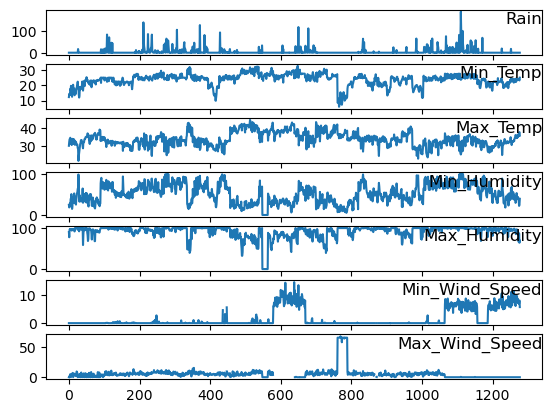

In [148]:

from matplotlib import pyplot

values = df_warangal.values
# specify columns to plot
groups = [0, 1,2, 3, 4, 5, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df_warangal.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [149]:
#very few unique values
Name_List = ["Rain",  "Min_Temp",  "Max_Temp",  "Min_Humidity",  "Max_Humidity", "Min_Wind_Speed",  "Max_Wind_Speed"]
col_todel=[]
print('Feature name, Number of unique values, Percentage of unique values out of all rows in the dataset')
  
for i in range(df_warangal.shape[1]):
  col=list(df_warangal[Name_List[i]])
  num = np.unique(col).size
  percentage = float(num / df_warangal.shape[0]) * 100
  if percentage < 1:
      col_todel.append(i)
  print('%s, %d, %.1f%%' % (Name_List[i], num, percentage))
print('\n Column to delete', col_todel)
for j in col_todel:
  print('\n Feature to delete', Name_List[j])

Feature name, Number of unique values, Percentage of unique values out of all rows in the dataset
Rain, 186, 14.6%
Min_Temp, 213, 16.7%
Max_Temp, 220, 17.2%
Min_Humidity, 691, 54.1%
Max_Humidity, 320, 25.0%
Min_Wind_Speed, 98, 7.7%
Max_Wind_Speed, 123, 9.6%

 Column to delete []


In [150]:
for i in col_todel:
    df_warangal.drop(Name_List[i], axis=1, inplace=True)
print(df_warangal.shape)

(1278, 7)


In [151]:
df_warangal = df_warangal.drop("Rain", axis=1)

          Min_Temp  Max_Humidity  Min_Humidity  Max_Wind_Speed  Min_Wind_Speed
count  1278.000000   1278.000000    1278.00000     1202.000000     1263.000000
mean     23.612715     90.885172      51.67680        5.698419        1.654632
std       3.848278     15.598395      22.65489        9.670734        3.163116
min       6.000000      0.000000       0.00000        0.000000        0.000000
25%      22.100000     87.675000      34.72500        0.700000        0.000000
50%      24.300000     97.700000      51.10000        4.700000        0.000000
75%      25.900000    100.000000      67.90000        6.700000        0.350000
max      32.600000    100.000000      99.90000       67.400000       14.800000
         Min_Temp  Max_Humidity  Min_Humidity  Max_Wind_Speed  Min_Wind_Speed
count  835.000000    835.000000    835.000000      820.000000      820.000000
mean    23.631497     94.270659     55.941557        5.265244        0.017683
std      2.633011      7.701716     20.136702        2.

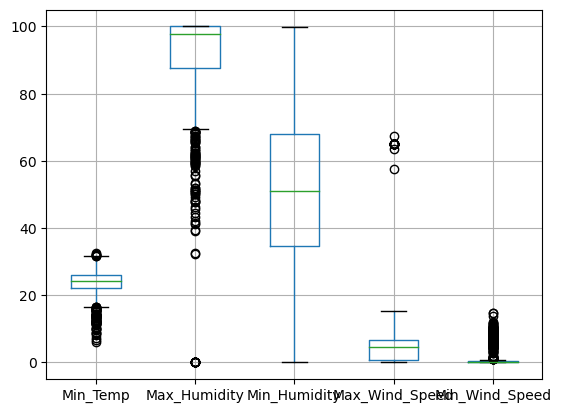

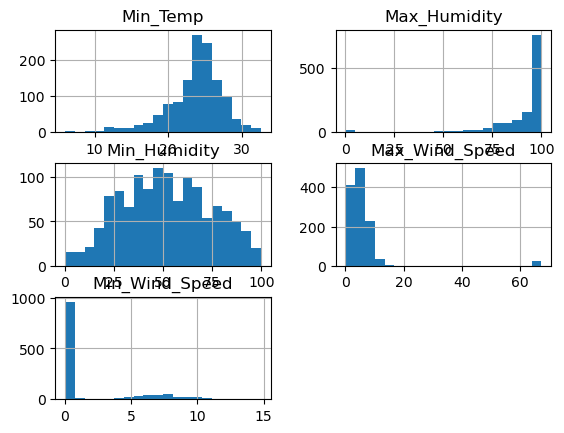

In [152]:
# identify features with outliers
features = [ "Min_Temp", "Max_Humidity", "Min_Humidity", "Max_Wind_Speed", "Min_Wind_Speed"]

# calculate descriptive statistics
print(df_warangal[features].describe())

# create boxplots
df_warangal[features].boxplot()

# create histograms
df_warangal[features].hist(bins=20)

# identify outliers using IQR method
Q1 = df_warangal[features].quantile(0.25)
Q3 = df_warangal[features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_warangal[features] < (Q1 - 1.5 * IQR)) | (df_warangal[features] > (Q3 + 1.5 * IQR))).any(axis=1)

# # remove outliers from DataFrame
df_warangal = df_warangal[~outliers]
print(df_warangal[features].describe())


In [153]:
# prepare data for lstm

from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
values = df_warangal.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.078014   0.585253   0.114865   0.874172        0.0   0.331169  0.014184   
2   0.014184   0.502304   0.318694   0.920530        0.0   0.097403  0.219858   
3   0.219858   0.428571   0.315315   0.874172        0.0   0.012987  0.063830   
4   0.063830   0.497696   0.447072   0.874172        0.0   0.253247  0.205674   
5   0.205674   0.497696   0.336712   0.920530        0.0   0.461039  0.269504   

    var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  
1  0.502304  0.318694  0.920530      0.0  0.097403  
2  0.428571  0.315315  0.874172      0.0  0.012987  
3  0.497696  0.447072  0.874172      0.0  0.253247  
4  0.497696  0.336712  0.920530      0.0  0.461039  
5  0.428571  0.369369  0.874172      0.0  0.006494  


In [43]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [156]:

df_warangal=df_warangal.reset_index()

In [45]:
# # Extract additional information from the Date column
# df_warangal["Month"] = pd.to_datetime(df_warangal["Date"]).dt.month
# df_warangal["DayOfWeek"] = pd.to_datetime(df_warangal["Date"]).dt.dayofweek
# df_warangal["DayOfYear"] = pd.to_datetime(df_warangal["Date"]).dt.dayofyear
# df_warangal[["Min_Temp", "Max_Temp", "Min_Humidity", "Max_Humidity", "Min_Wind_Speed", "Max_Wind_Speed", "Month", "DayOfWeek", "DayOfYear"]]

In [157]:
df_warangal.shape

(835, 9)

In [158]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [159]:
df_warangal.head()

,level_0,index,Date,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
0,0,0,2019-05-01,17.6,34.8,21.3,96.2,0.0,5.1
1,1,1,2019-06-01,16.7,33.0,39.4,97.6,0.0,1.5
2,2,2,2019-07-01,19.6,31.4,39.1,96.2,0.0,0.2
3,3,3,2019-08-01,17.4,32.9,50.8,96.2,0.0,3.9
4,4,4,2019-12-01,19.4,32.9,41.0,97.6,0.0,7.1


In [160]:

Maximum_Temperature = df_warangal['Max_Temp']
values = Maximum_Temperature.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [161]:

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [162]:

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [163]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
608/608 [==============================] - 22s 29ms/step - loss: 0.0167
Epoch 2/3
608/608 [==============================] - 18s 30ms/step - loss: 0.0133
Epoch 3/3
608/608 [==============================] - 18s 29ms/step - loss: 0.0112


In [165]:

predictions = model.predict(x_test)
print(x_train.shape)
print(x_test.shape)
print(x_test[0])
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6/6 [==============================] - 1s 24ms/step
(608, 60, 1)
(167, 60, 1)
[[0.63133641]
 [0.53917051]
 [0.52995392]
 [0.55299539]
 [0.64516129]
 [0.52534562]
 [0.47926267]
 [0.53456221]
 [0.61751152]
 [0.56221198]
 [0.49769585]
 [0.50691244]
 [0.56221198]
 [0.62211982]
 [0.58986175]
 [0.40552995]
 [0.46543779]
 [0.50691244]
 [0.56221198]
 [0.6359447 ]
 [0.6359447 ]
 [0.63133641]
 [0.60368664]
 [0.60368664]
 [0.51612903]
 [0.61751152]
 [0.53917051]
 [0.60829493]
 [0.52073733]
 [0.50691244]
 [0.40092166]
 [0.52073733]
 [0.28110599]
 [0.12442396]
 [0.39631336]
 [0.57142857]
 [0.55760369]
 [0.52534562]
 [0.49769585]
 [0.47926267]
 [0.50691244]
 [0.58525346]
 [0.52073733]
 [0.50691244]
 [0.61751152]
 [0.62211982]
 [0.61290323]
 [0.59447005]
 [0.47926267]
 [0.50230415]
 [0.58986175]
 [0.49308756]
 [0.50691244]
 [0.55299539]
 [0.49769585]
 [0.48387097]
 [0.39631336]
 [0.43778802]
 [0.42857143]
 [0.359447  ]]


0.33978592649905276

In [166]:
df_warangal['Date'] = pd.to_datetime(df_warangal['Date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


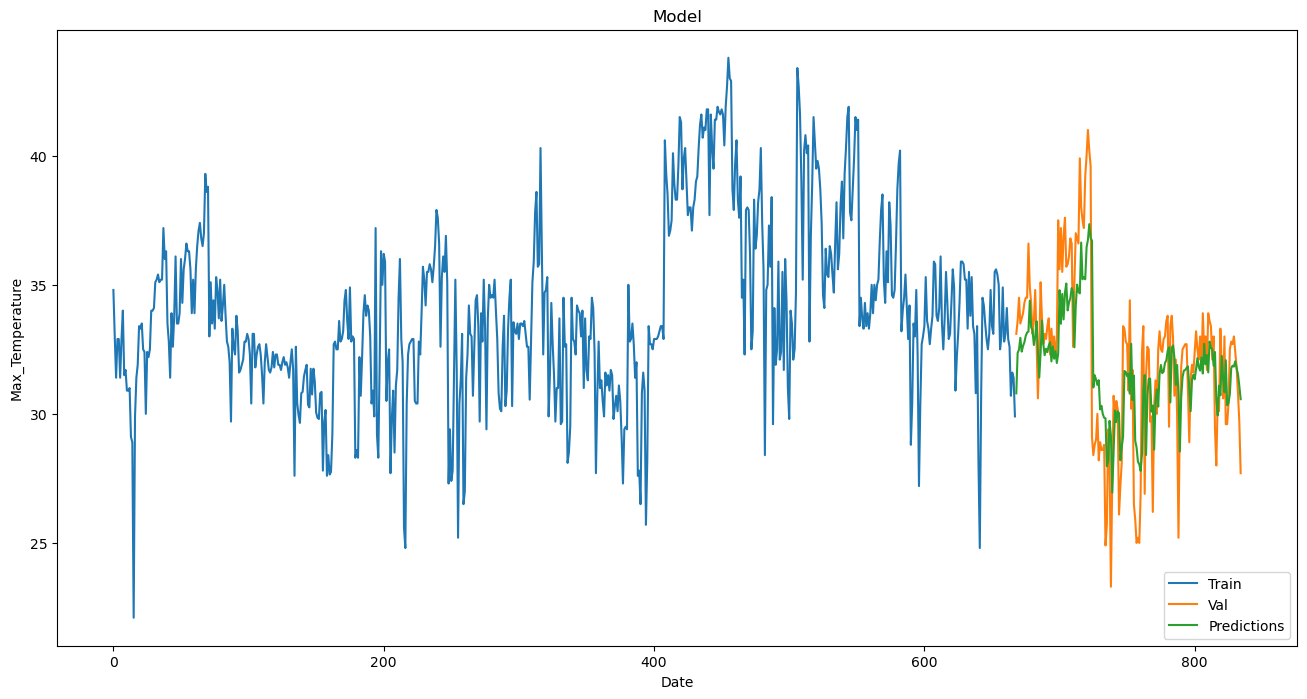

In [167]:

data = df_warangal.filter(['Max_Temp'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Max_Temperature')
plt.plot(train)
plt.plot(validation[['Max_Temp', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()